# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [191]:
from __future__ import print_function
__author__= 'Cyrus Blankinship'

import os

#Data handling
import numpy as np
import pandas as pd

#Downloading data
import requests
try:
    import urllib2 as urlib
except ImportError:
    import urllib as urlib

#Also needed for parsing downloaded data sometimes
try:
    import StringIO as io
except ImportError:
    import io

#For reading json data
import json

#For plotting
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(context='notebook', style='whitegrid', palette='deep', font='DejaVu Sans', font_scale=1.2, rc=None)
%matplotlib inline

In [43]:
#download world bank 
popdf = pd.read_excel('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel',skiprows=[0,1,2]) #world bank data
popdf.rename(columns={'2017':'pop'},inplace=True)

gdpdf = pd.read_excel('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel',skiprows=[0,1,2])
gdpdf.rename(columns={'2017':'gdp'},inplace=True)

wb = popdf[['Country Name','pop']].merge(gdpdf[['Country Name','gdp']],on='Country Name')
wb.head()


,Country Name,pop,gdp
0,Aruba,105264.0,NaN
1,Afghanistan,35530081.0,2.081530e+10
2,Angola,29784193.0,1.242094e+11
3,Albania,2873457.0,1.303935e+10
4,Andorra,76965.0,3.012914e+09


In [28]:
#download mass shootings
puidata = os.getenv("PUIDATA")

url2 = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
filename = 'data-pvLFI.csv'

urlib.request.urlretrieve(url, filename)
os.system("mv " + filename + " " + puidata)

stringpull= puidata + '/' + filename
mass_shootings = pd.read_csv(stringpull)
mass_shootings.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [30]:
firearms = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
firearms.head(5)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [50]:
firearms_clean = firearms[['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']]

df = wb.merge(firearms_clean,left_on='Country Name',right_on='Country/Territory')
df = df.merge(mass_shootings,left_on='Country Name',right_on='Country')
df.drop(['Country/Territory','Country'],inplace=True,axis=1)
df.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings'},inplace=True)
df.head()


,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings
0,Australia,24598933.0,1.323421e+12,30.0,3050000.0,15.0,4
1,Austria,8809212.0,4.165957e+11,18.0,2500000.0,30.4,1
2,Belgium,11372068.0,4.926813e+11,70.0,1800000.0,17.2,2
3,Canada,36708083.0,1.653043e+12,173.0,9950000.0,30.8,4
4,Switzerland,8466017.0,6.788873e+11,57.0,3400000.0,45.7,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


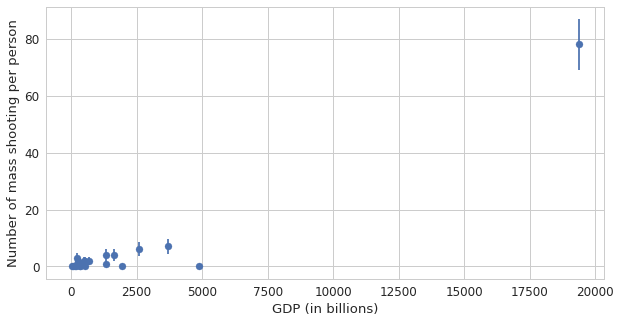

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [52]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [75]:
df['shootingspp'] = df["Number of mass shootings"] / df['pop'] * 1e3 #in thousands

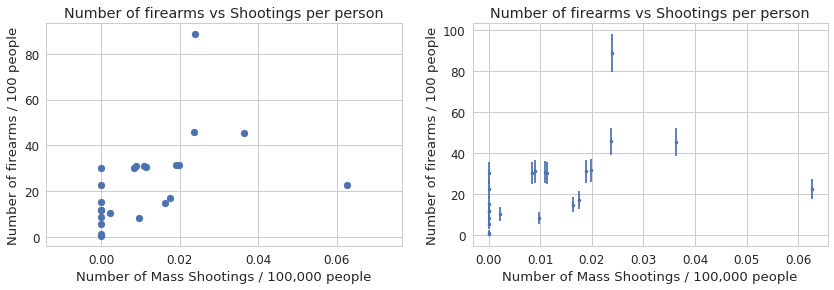

In [378]:
fig = plt.figure(figsize=(14,9)) 
ax = fig.add_subplot(221)

scatter = ax.scatter(df['shootingspp']*1e2, df['Guns per 100 inhabitants'])
# ax.errorbar(df['shootingspp']*1e2, df['Guns per 100 inhabitants'], 
#             yerr = np.sqrt(df['Guns per 100 inhabitants']*1.0), fmt = '.')
ax.set_xlabel("Number of Mass Shootings / 100,000 people")
ax.set_ylabel("Number of firearms / 100 people")
ax.set_ylim()
ax.set_title("Number of firearms vs Shootings per person")


ax = fig.add_subplot(222)

# scatter = ax.scatter(df['shootingspp'], df['Guns per 100 inhabitants'])
ax.errorbar(df['shootingspp']*1e2, df['Guns per 100 inhabitants'], 
            yerr = np.sqrt(df['Guns per 100 inhabitants']*1.0), fmt = '.')
ax.set_xlabel("Number of Mass Shootings / 100,000 people")
ax.set_ylabel("Number of firearms / 100 people")
ax.set_ylim()
ax.set_title("Number of firearms vs Shootings per person")

plt.show()



**Figure 2**: The graph shows that there is one outlier with a large # of mass shootings per 10,000 people (New Zealand). When compared to the graph above, this is probably due to the fact that New Zealand has a much smaller population than some of the other countries and is therefore weighed more heavily by each individual mass shooting. The figure also shows that the United States is an outlier in that there is a large amount of firearms per person, almost twice as much as the next highest country

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

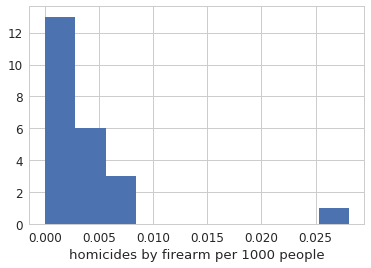

In [71]:
fig, ax = plt.subplots()
ax.hist((df['Number of homicides by firearm'] / df['pop']) * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


**Figure 3**: There is an obvious outlier that has a much higher homicide rate. Surprise, surprise, its the US of A

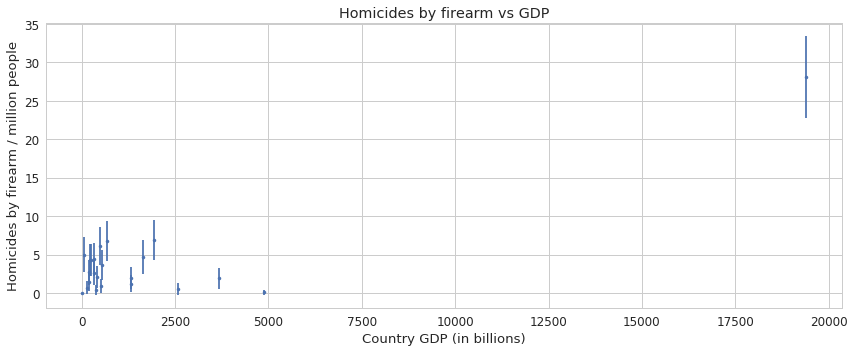

In [101]:
fig = plt.figure(figsize=(12,5)) 
ax = fig.add_subplot(111)


ax.errorbar(df['gdp']/1e9, (df['Number of homicides by firearm'] / df['pop']) * 1000000, 
            yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000000), fmt = '.')
ax.set_xlabel("Country GDP (in billions)")
ax.set_ylabel("Homicides by firearm / million people")
ax.set_ylim()
ax.set_title("Homicides by firearm vs GDP")
plt.tight_layout()

plt.show()


**Figure 4:** The United States is a sever outlier once again as it's homicide rate is over 4 times the next highest value

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [105]:
def US_check(country):
    if country=="United States":
        return 1
    else:
        return 0

df['homicidespp'] = df['Number of homicides by firearm'] / df['pop'] #homicides per person 
df['is_USA'] = df['Country Name'].map(US_check) #for labeling the United States later

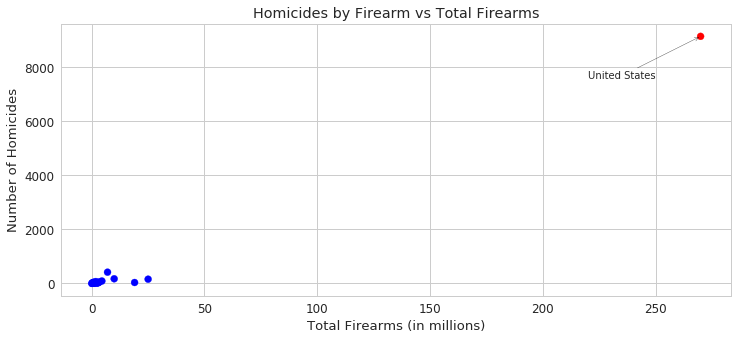

In [170]:
fig = plt.figure(figsize=(12,5)) 
ax = fig.add_subplot(111)

ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm'],c=df['is_USA'],cmap='bwr')
# ax.errorbar(df['gdp']/1e9, (df['Number of homicides by firearm'] / df['pop']) * 1000000, 
#             yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000000), fmt = '.')
ax.set_xlabel("Total Firearms (in millions)")
ax.set_ylabel("Number of Homicides")
ax.set_ylim()
ax.set_title("Homicides by Firearm vs Total Firearms")

#Annotate United State
us = df.loc[df['Country Name'] == 'United States']
totalfirearms = us['Average total all civilian firearms']
homicides = us['Number of homicides by firearm']
ax.annotate('United States',xy=(totalfirearms.values[0]/1e6,homicides.values[0]),ha='right',va='bottom',xytext=(250,7500),arrowprops=dict(arrowstyle = '->'))


plt.show()

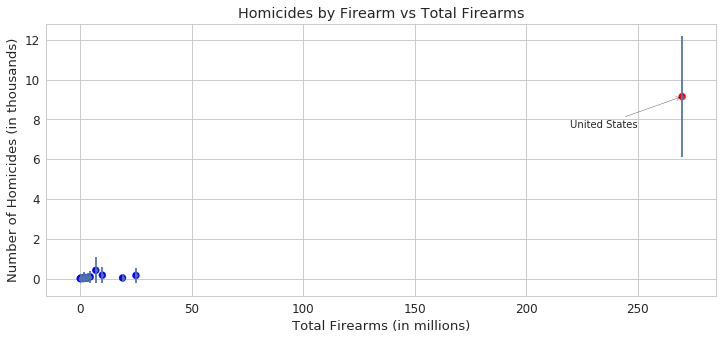

In [175]:
fig = plt.figure(figsize=(12,5)) 
ax = fig.add_subplot(111)

ax.errorbar(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm']/1e3,
            yerr=np.sqrt(df['Number of homicides by firearm']/1e3)*1.0, fmt = '.')
ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of homicides by firearm']/1e3,c=df['is_USA'],cmap='bwr')

ax.set_xlabel("Total Firearms (in millions)")
ax.set_ylabel("Number of Homicides (in thousands)")
ax.set_ylim()
ax.set_title("Homicides by Firearm vs Total Firearms")

#Annotate United State
us = df.loc[df['Country Name'] == 'United States']
totalfirearms = us['Average total all civilian firearms']
homicides = us['Number of homicides by firearm']
ax.annotate('United States',xy=(totalfirearms.values[0]/1e6,homicides.values[0]/1e3),ha='right',va='bottom',xytext=(250,7.5),arrowprops=dict(arrowstyle = '->'))

plt.show()

**Figure 5**: The United States is once again our outlier in both the total numbers of firearms and number of homicides. This is because neither the exogenous or endogenous variables are scaled to population so the US is separated by both its large size and high rate of homicides and gun ownership

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [176]:
df.columns

Index(['Country Name', 'pop', 'gdp', 'Number of homicides by firearm',
       'Average total all civilian firearms', 'Guns per 100 inhabitants',
       'Number of mass shootings', 'shootingspp', 'homicidespp', 'is_USA'],
      dtype='object')

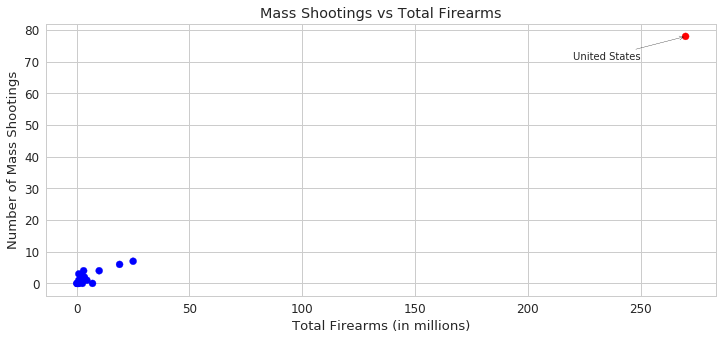

In [179]:
fig = plt.figure(figsize=(12,5)) 
ax = fig.add_subplot(111)

ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'],c=df['is_USA'],cmap='bwr')
# ax.errorbar(df['gdp']/1e9, (df['Number of homicides by firearm'] / df['pop']) * 1000000, 
#             yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000000), fmt = '.')
ax.set_xlabel("Total Firearms (in millions)")
ax.set_ylabel("Number of Mass Shootings")
ax.set_ylim()
ax.set_title("Mass Shootings vs Total Firearms")

#Annotate United State
us = df.loc[df['Country Name'] == 'United States']
totalfirearms = us['Average total all civilian firearms']
shootings = us['Number of mass shootings']
ax.annotate('United States',xy=(totalfirearms.values[0]/1e6,shootings.values[0]),ha='right',va='bottom',xytext=(250,70),arrowprops=dict(arrowstyle = '->'))


plt.show()

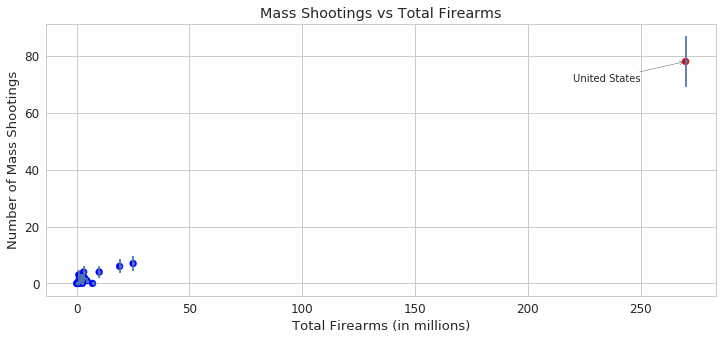

In [180]:
fig = plt.figure(figsize=(12,5)) 
ax = fig.add_subplot(111)

ax.scatter(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'],c=df['is_USA'],cmap='bwr')
ax.errorbar(df['Average total all civilian firearms']/1e6, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings']), fmt = '.')
ax.set_xlabel("Total Firearms (in millions)")
ax.set_ylabel("Number of Mass Shootings")
ax.set_ylim()
ax.set_title("Mass Shootings vs Total Firearms")

#Annotate United State
us = df.loc[df['Country Name'] == 'United States']
totalfirearms = us['Average total all civilian firearms']
shootings = us['Number of mass shootings']
ax.annotate('United States',xy=(totalfirearms.values[0]/1e6,shootings.values[0]),ha='right',va='bottom',xytext=(250,70),arrowprops=dict(arrowstyle = '->'))


plt.show()

**Figure 6**: The plots show that once again the US is an outlier. Notice that the US had over 8 times the shootings as the next highest

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [241]:
df.describe()

,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,shootingspp,homicidespp,is_USA
count,2.300000e+01,2.300000e+01,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,3.936463e+07,1.806716e+12,453.434783,1.565543e+07,23.786957,4.956522,0.000118,0.000004,0.043478
std,7.004432e+07,4.027355e+12,1897.064355,5.578880e+07,19.089581,16.046745,0.000151,0.000006,0.208514
min,3.412840e+05,2.390929e+10,0.000000,7.000000e+04,0.600000,0.000000,0.000000,0.000000,0.000000
25%,5.640453e+06,2.347280e+11,13.000000,6.800000e+05,11.150000,0.000000,0.000000,0.000001,0.000000
50%,1.029372e+07,4.926813e+11,30.000000,2.400000e+06,22.500000,1.000000,0.000089,0.000003,0.000000
75%,4.227393e+07,1.488232e+12,63.500000,3.950000e+06,31.000000,2.500000,0.000183,0.000005,0.000000
max,3.257192e+08,1.939060e+13,9146.000000,2.700000e+08,88.800000,78.000000,0.000626,0.000028,1.000000


In [289]:
df['scaledFirearms'] = df['Guns per 100 inhabitants']/100 # scaled
df['scaledShootings'] = df['shootingspp']/.0001

In [337]:
def weights(y): #Weight function used later
    '''takes the inverse of the error'''
    for i in range(len(y)):
        if y[i]==0: #correct for 0 value
            y[i]=1
    return 1/np.sqrt(y)
weights = weights(df.scaledShootings)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [364]:
x_constant = sm.add_constant(df.scaledFirearms) #learned this in assignment 2

olsmodel = smf.ols('y ~ x + const',data={'x':df.scaledFirearms,'y':df.scaledShootings,'const':np.ones(len(df.scaledFirearms))}).fit()
wlsmodel = smf.WLS(df.scaledShootings,x_constant,weights=weights).fit()

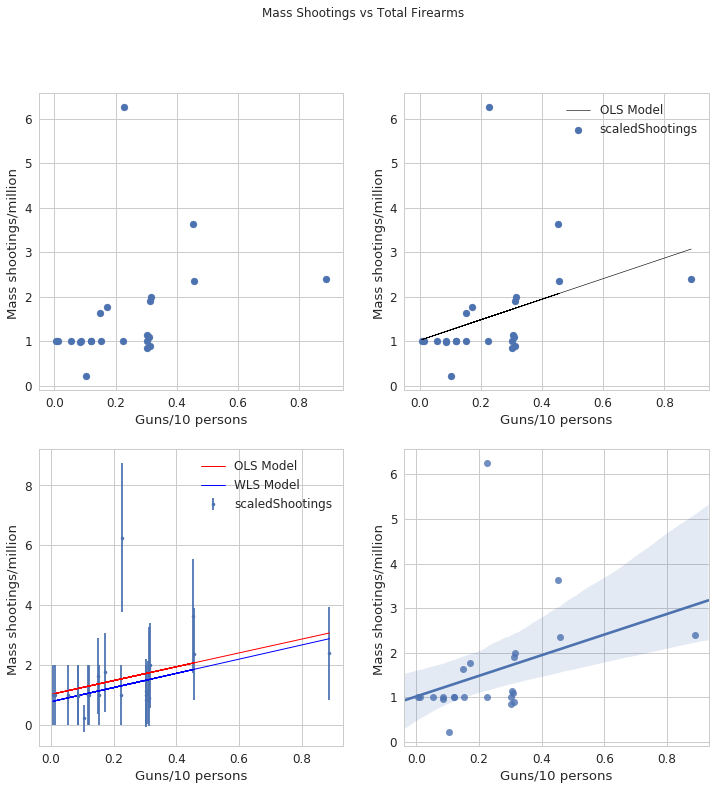

In [374]:
fig = plt.figure(figsize=(12,12)) 
fig.suptitle('Mass Shootings vs Total Firearms')

x = df.scaledFirearms # scaled
y = df.scaledShootings

ax = fig.add_subplot(221)
ax.scatter(x, y)
# ax.errorbar(df['gdp']/1e9, (df['Number of homicides by firearm'] / df['pop']) * 1000000, 
#             yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000000), fmt = '.')
ax.set_xlabel("Guns/10 persons")
ax.set_ylabel("Mass shootings/million ")

ax = fig.add_subplot(222)
ax.scatter(x, y)
# ax.errorbar(df['gdp']/1e9, (df['Number of homicides by firearm'] / df['pop']) * 1000000, 
#             yerr = np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000000), fmt = '.')
ax.set_xlabel("Guns/10 persons")
ax.set_ylabel("Mass shootings/million ")
ax.plot(x,olsmodel.predict(x_constant),'k',lw=0.6,label='OLS Model')
ax.legend()

ax = fig.add_subplot(223)
# ax.scatter(x, y)
ax.errorbar(x, y, 
            yerr = np.sqrt(y), fmt = '.')
ax.set_xlabel("Guns/10 persons")
ax.set_ylabel("Mass shootings/million ")
ax.plot(x,olsmodel.predict(x_constant),'r',lw=1,label='OLS Model')
ax.plot(x,wlsmodel.predict(x_constant),'b',lw=1,label='WLS Model')
ax.legend()

ax = fig.add_subplot(224)
# plt.figure()
# import seaborn  as sns
sns.regplot(x="scaledFirearms", y="scaledShootings", data=df,ax=ax)
ax.set_xlabel("Guns/10 persons")
ax.set_ylabel("Mass shootings/million ")
# plt.tight_layout()
plt.show()

**Figure 7:** The plots show that the WLS and OLS fits are very similar. The difference is that the WLS has an intercept more or less at 0. This is most likely due to my weight function, which gives a weight of 1 to any country that has 0 mass shootings. This was a conscious choice since the error is minimized for these countries.

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [345]:
#This essentially eliminates US as an outlier
mask = ((df.shootingspp/.0001 > 2) & (df['Guns per 100 inhabitants']>50))
df_masked = df[~mask]

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



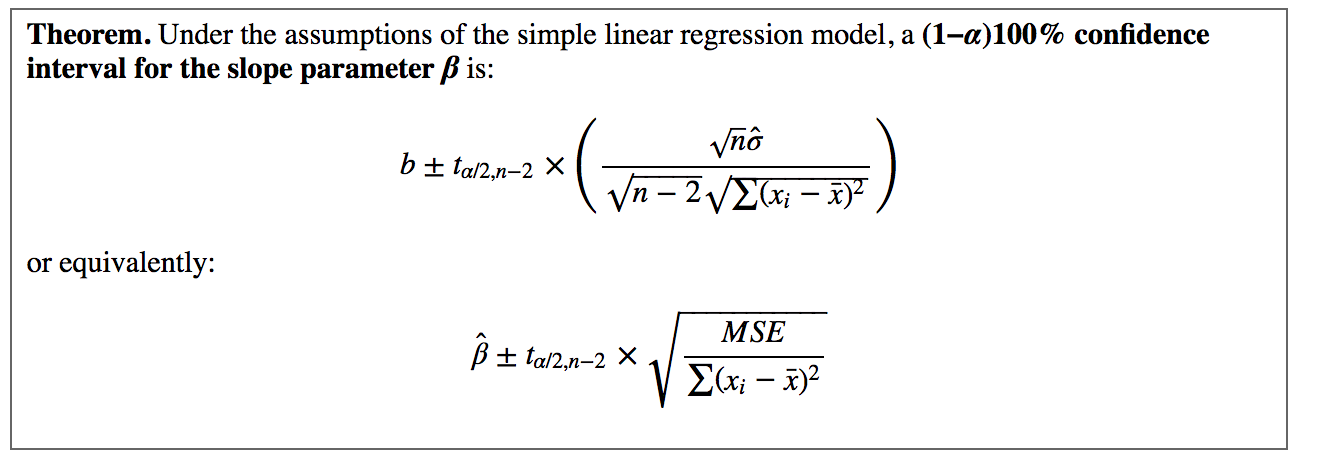

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

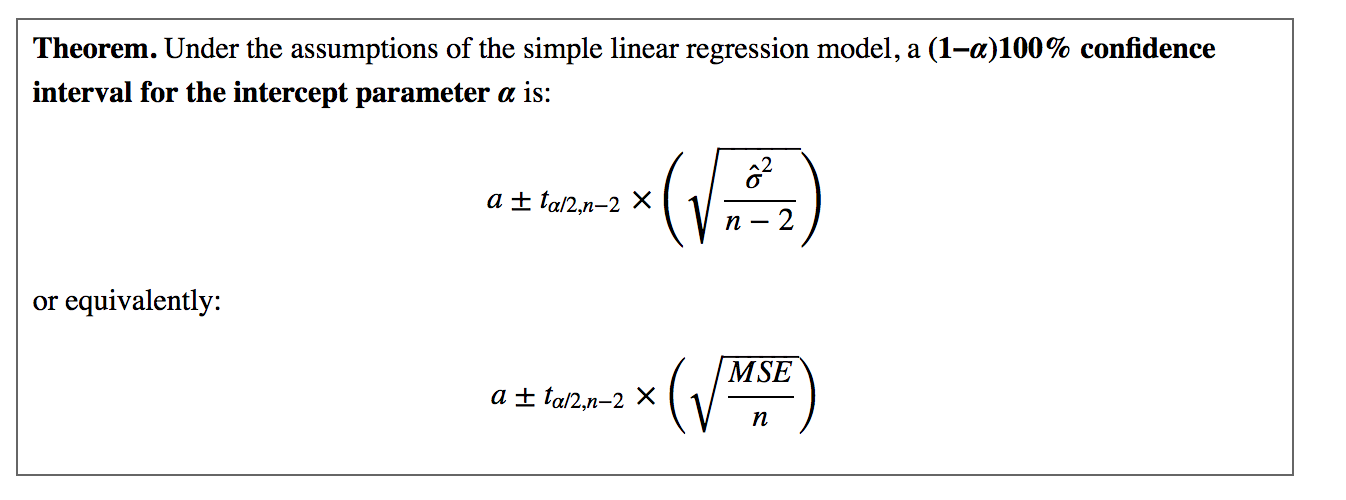

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

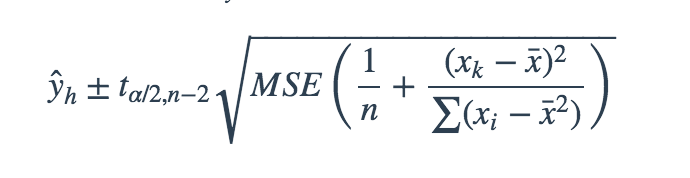

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

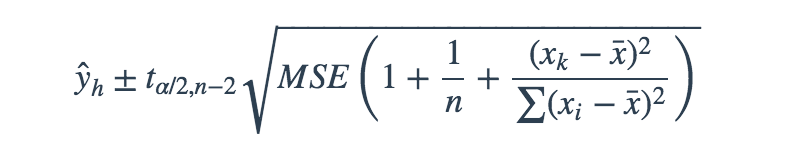

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

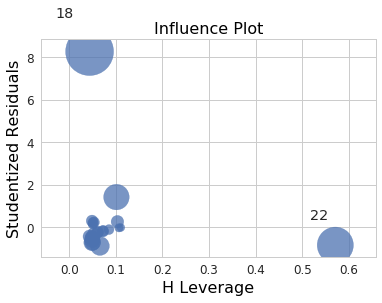

In [369]:
sm.graphics.influence_plot(olsmodel, alpha  = 0.05, criterion="cooks");

**Figure 8**: This plot shows the influence of each country's variables as measured by leverage and residuals. According to the reading, these are how we should think of the two components of influence.
* **leverage**: effect of a unit change in yi on the fitted value.
    * leverage is minimum when $x_i =x_{bar}$, constrained between 1/n and 1
* **residuals**: distance between yi and fitted value at x.

After investigating the values corresponding to each index labeled (18 & 22), I found that the United States had the most influence measured by Leverage, and New Zealand had the most influence measured by Residuals.

In [372]:
df.iloc[22], df.iloc[18]

(Country Name                           United States
 pop                                      3.25719e+08
 gdp                                      1.93906e+13
 Number of homicides by firearm                  9146
 Average total all civilian firearms          2.7e+08
 Guns per 100 inhabitants                        88.8
 Number of mass shootings                          78
 shootingspp                               0.00023947
 homicidespp                              2.80794e-05
 is_USA                                             1
 scaledFirearms                                 0.888
 scaledShootings                               2.3947
 Name: 22, dtype: object, Country Name                           New Zealand
 pop                                     4.7939e+06
 gdp                                    2.05853e+11
 Number of homicides by firearm                   7
 Average total all civilian firearms         925000
 Guns per 100 inhabitants                      22.6
 Number of mass

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

**Figure 8**: The plot shows the influence of each country's variables as measured by leverage and residuals. According to the reading, these are how we should think of the two components of influence.
* **leverage**: effect of a unit change in yi on the fitted value.
    * leverage is minimum when $x_i =x_{bar}$, constrained between 1/n and 1
* **residuals**: distance between yi and fitted value at x.

After investigating the values corresponding to each index labeled (18 & 22), I found that the United States had the most influence measured by Leverage, and New Zealand had the most influence measured by Residuals.